In [22]:
#importing libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import time
import random
from skimage.util import random_noise

In [3]:
#getting the raw images as input
#change the paths to your liking

wiki_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Fiverr_colabs/wiki.jpg",0)
ff_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Fiverr_colabs/Frequency_Filter.jpg",0)


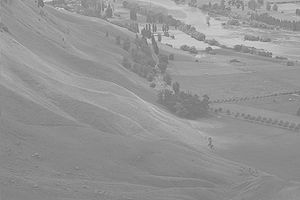

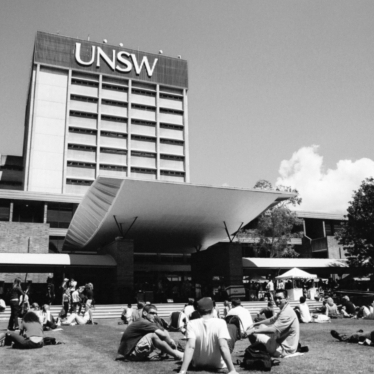

In [4]:
# displayingthe test images
cv2_imshow(wiki_image)
cv2_imshow(ff_image)

### Task 1

--- 0.0004444122314453125 seconds ---


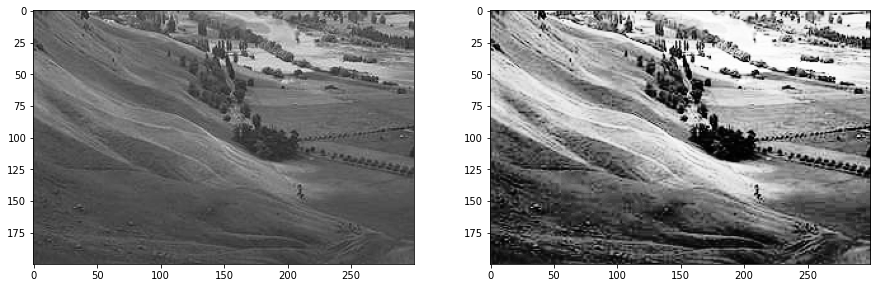

In [5]:
# histogram equalization function

# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram


# execute our histogram function
hist = get_histogram(wiki_image.flatten(), 256)

# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
#plt.plot(cs)

# Histogram equaliation function starts here
def hist_equal(cs,image):

  # numerator & denomenator
  nj = (cs - cs.min()) * 255
  N = cs.max() - cs.min()

  # re-normalize the cumsum
  cs = nj / N

  # cast it back to uint8 since we can't use floating point values in images
  cs = cs.astype('uint8')

  #plt.plot(cs)

  # get the value from cumulative sum for every index in flat, and set that as img_new
  img_new = cs[image]

  # put array back into original shape since we flattened it
  img_new = np.reshape(img_new, image.shape)

  return img_new

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(wiki_image, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)

start_time_hist = time.time()
wiki_hist_eq = hist_equal(cs,wiki_image)
print("--- %s seconds ---" % (time.time() - start_time_hist))

plt.imshow(wiki_hist_eq, cmap='gray')

plt.show(block=True)





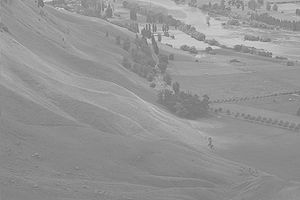

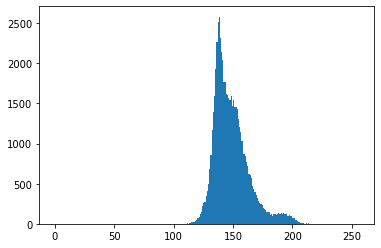

In [6]:
# displaying the histograms before histogram equalization
cv2_imshow(wiki_image)
plt.hist(wiki_image.ravel(),256,[0,256]); plt.show()

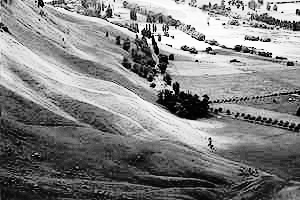

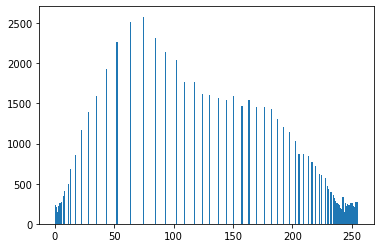

In [7]:
#after histogram equalization
cv2_imshow(wiki_hist_eq)
plt.hist(wiki_hist_eq.ravel(),256,[0,256]); plt.show()

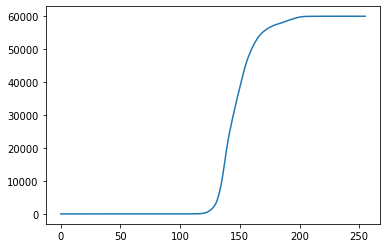

In [8]:
#CDF of wiki_image before histogram eqaulization

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

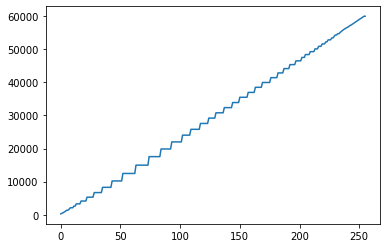

In [9]:
#CDF of wiki_image after histogram eqaulization

# execute our histogram function
hist2 = get_histogram(wiki_hist_eq.flatten(), 256)

# execute the fn
cs2 = cumsum(hist2)

# display the result
plt.plot(cs2)

--- 0.00924372673034668 seconds ---


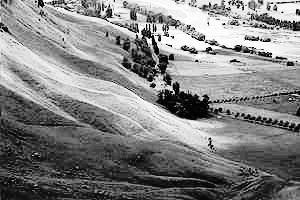

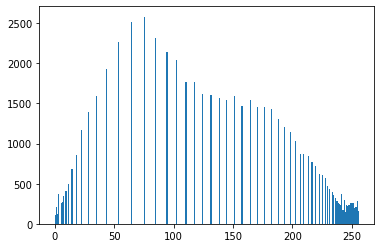

In [10]:
# openCV histogram equalization

start_time_hist_2 = time.time()
wiki_hist_eq_openCV = cv2.equalizeHist(wiki_image)
print("--- %s seconds ---" % (time.time() - start_time_hist_2))

#after histogram equalization
cv2_imshow(wiki_hist_eq_openCV)
plt.hist(wiki_hist_eq_openCV.ravel(),256,[0,256]); plt.show()

### Task 2

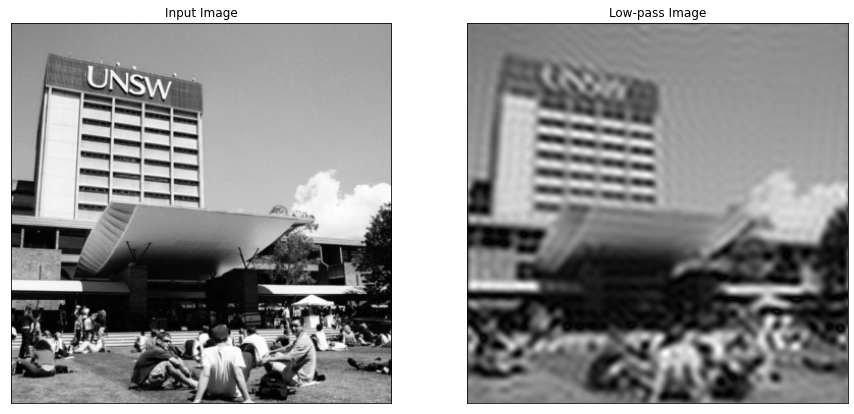

In [11]:
# Low pass filter for an image

img_float32 = np.float32(ff_image)

# get the DFT
dft = cv2.dft(img_float32, 
              flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

# get rows and columns
rows, cols = ff_image.shape
# center
crow,ccol = rows//2, cols//2

# creating the mask
# center squre is 1 and remaining all zeros 
mask = np.zeros((rows, cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30] = 1

# applying the mask
fshift = dft_shift*mask

# get the inverse
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# poltting
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(ff_image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Low-pass Image'), plt.xticks([]), plt.yticks([]) 
plt.show()

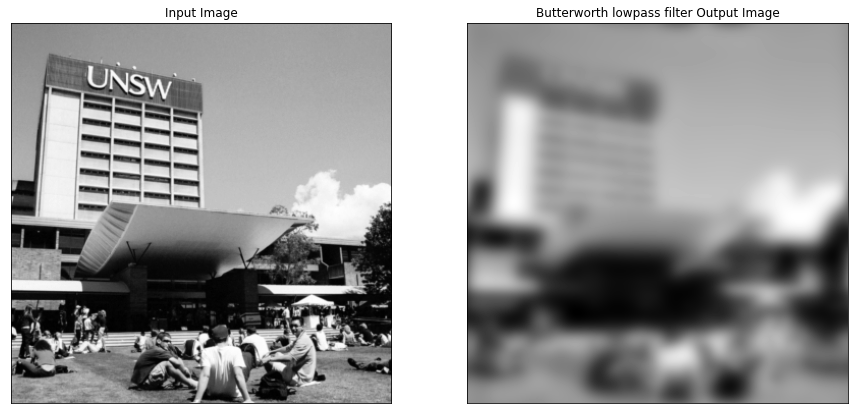

In [12]:
# applying butterworth filter

import math

# utility function to get the distance
def distance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)


# change D0 and n according to the prefference
def butterworth(ff_image, D0,n):

  img_float32 = np.float32(ff_image)

  # get the DFT
  dft = cv2.dft(img_float32, 
              flags = cv2.DFT_COMPLEX_OUTPUT)

  dft_shift = np.fft.fftshift(dft)

  # get rows and columns
  rows, cols = ff_image.shape
  # center
  crow,ccol = rows//2, cols//2

  # butterworth parameters   ---> change these
  #D0 = 10
  #n=2

  #get the butterworth filter mask
  # creating the mask
  mask = np.zeros((rows, cols,2),np.float32)
  for i in range(rows):
    for j in range(cols):
      D = np.sqrt((i - crow)**2 + (j - ccol)**2) #distance from (i,j) to center
      B = 1/(1 + (D/D0)**(2*n)) #buttorworth equation
      mask[i][j] = [B,B]

  # applying the mask
  fshift = dft_shift*mask

  # get the inverse
  f_ishift = np.fft.ifftshift(fshift)
  img_back = cv2.idft(f_ishift)
  img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])


  # poltting
  plt.figure(figsize=(15,10))
  plt.subplot(121),plt.imshow(ff_image, cmap = 'gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
  plt.title('Butterworth lowpass filter Output Image'), plt.xticks([]), plt.yticks([]) 
  plt.show()

butterworth(ff_image, 10,2)

--- 0.020650148391723633 seconds ---


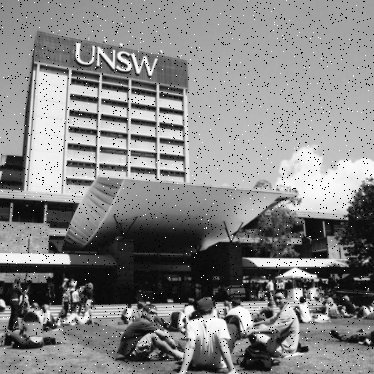

In [13]:
#task 4

# median filter

def medianFilter(img,kernal_val):
  padding = kernal_val//2   #get the padding
  result = np.zeros(img.shape)
  
  for y in range(padding,img.shape[0]-padding):
    for x in range(padding,img.shape[1]-padding):
      #get the neighbors
      neighbours = img[y-padding:y+padding+1,x-padding:x+padding+1]   #minus 1 form upper bound [0:2] --> 0,1 in python
      result[y,x] = np.median(neighbours)
  
  return np.array(result,dtype=np.uint8)


# functions to add noises

# to add salt and pepper noise
def add_noise_sp(img):
 
    # Getting the dimensions of the image
    row , col = img.shape

    #noisy = np.zeros(img.shape)

    noisy = img.copy()
     
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        noisy[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        noisy[y_coord][x_coord] = 0

    #cv2_imshow(img)
         
    return noisy


#get the salt and pepper noised image

start_time_sp = time.time()
noisy_sp = add_noise_sp(ff_image)
print("--- %s seconds ---" % (time.time() - start_time_sp))

cv2_imshow(noisy_sp)

--- 0.04823780059814453 seconds ---


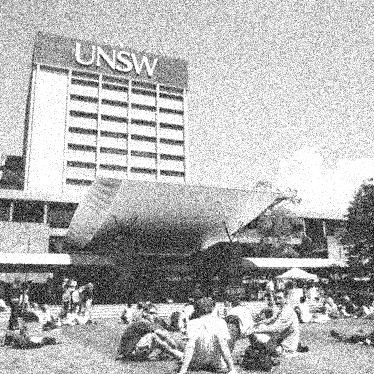

In [19]:
def add_noise_gauss(image,mean,var):
  row,col= image.shape
  #mean = 0
  #var = 0.1
  sigma = var**0.5
  gauss = np.random.normal(mean,sigma,(row,col))
  gauss = gauss.reshape(row,col)
  noisy = image + gauss
  return noisy

#get the gaussian noised image
start_time_gauss = time.time()
noisy_gauss = add_noise_gauss(ff_image,50,1000)
print("--- %s seconds ---" % (time.time() - start_time_gauss))

cv2_imshow(add_noise_gauss(ff_image,50,1000))



--- 0.027099132537841797 seconds ---


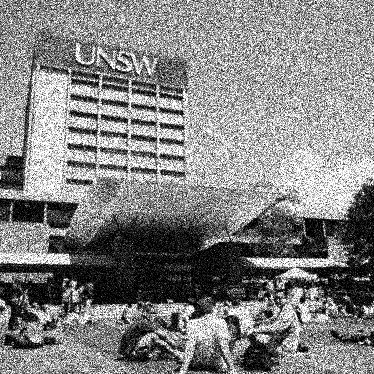

In [20]:
def add_noise_poisson(image,PEAK):
  #vals = len(np.unique(image))
  #vals = 2 ** np.ceil(np.log2(vals))
  #noisy = np.random.poisson(image * vals) / float(vals)
  noisy = np.random.poisson(image / 255.0 * PEAK) / PEAK * 255  # noisy image
  return noisy


#get the poisson noised image
start_time_poisson = time.time()
noisy_poisson = add_noise_poisson(ff_image,10)
print("--- %s seconds ---" % (time.time() - start_time_poisson))


cv2_imshow(add_noise_poisson(ff_image,10))

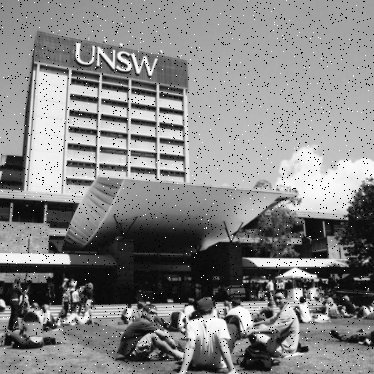

--- 3.5425631999969482 seconds ---


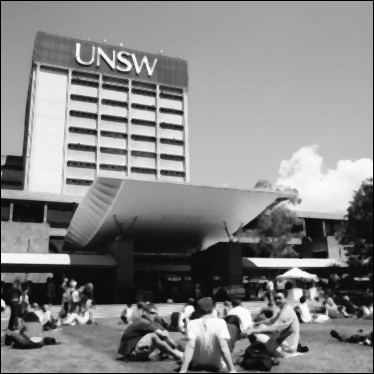

In [21]:
# applying the median filter to the above noisey images

cv2_imshow(noisy_sp)

start_time_median = time.time()
restored_img_sp = medianFilter(noisy_sp,3)
print("--- %s seconds ---" % (time.time() - start_time_median))

cv2_imshow(restored_img_sp)


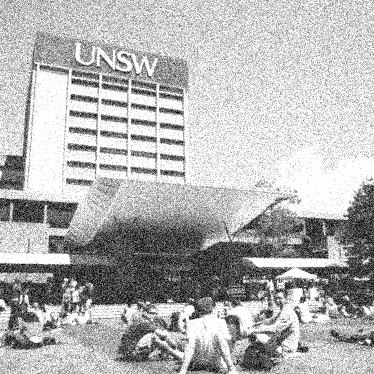

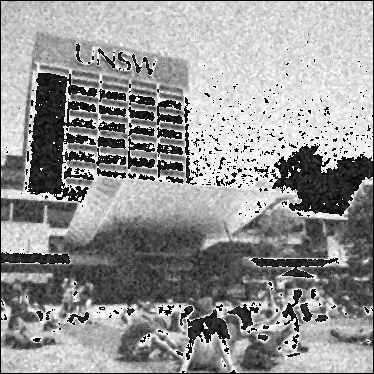

In [17]:
cv2_imshow(noisy_gauss)

cv2_imshow(medianFilter(noisy_gauss,3))

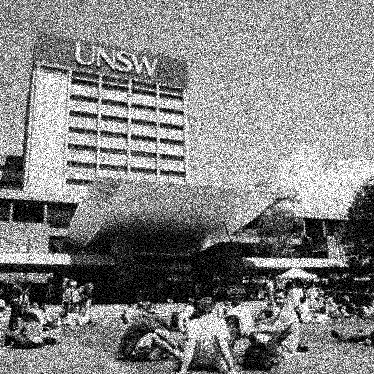

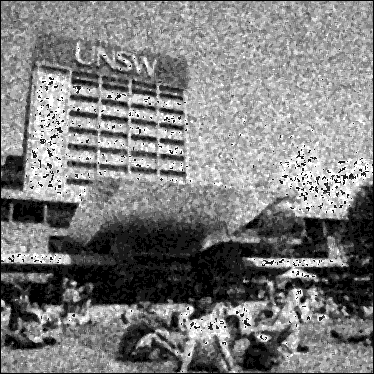

In [18]:
cv2_imshow(noisy_poisson)

cv2_imshow(medianFilter(noisy_poisson,3))

--- 0.04321408271789551 seconds ---


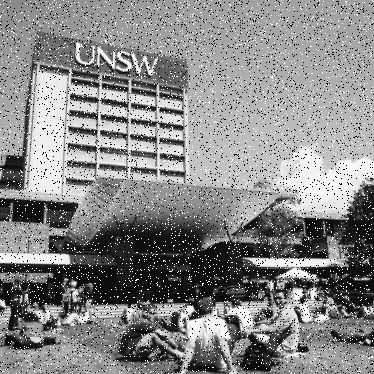

In [31]:
# cheking the runtime of the built in functions

start_time_sp_2 = time.time()
noisy_sp_builtin = random_noise(ff_image,mode='s&p',amount=0.1)
# above function returns a floating point image on range (0,1)
#therefore,
noisy_sp_builtin  = np.array(255*noisy_sp_builtin, dtype= 'uint8')
print("--- %s seconds ---" % (time.time() - start_time_sp_2))

cv2_imshow(noisy_sp_builtin)



--- 0.00041866302490234375 seconds ---


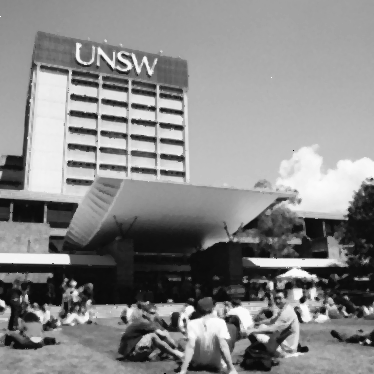

In [39]:
# using cv2.median blur

start_time_median_2 = time.time()
restored_sp_2 = cv2.medianBlur(noisy_sp_builtin,3)
print("--- %s seconds ---" % (time.time() - start_time_median_2))

cv2_imshow(restored_sp_2)

--- 0.012860536575317383 seconds ---


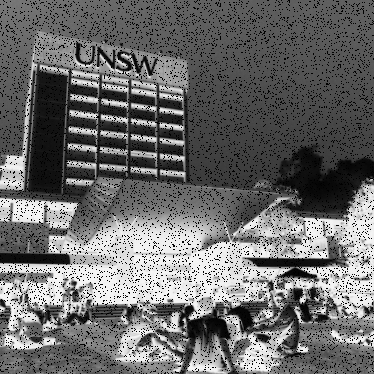

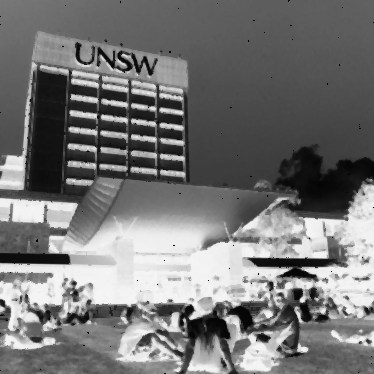

In [46]:
# above procedure for gaussian noise

start_time_gauss_2 = time.time()
noisy_gauss_builtin = random_noise(ff_image,mode='gaussian',mean=50,var=1000)
# above function returns a floating point image on range (0,1)
#therefore,
noisy_gauss_builtin  = np.array(255*noisy_sp_builtin, dtype= 'uint8')
print("--- %s seconds ---" % (time.time() - start_time_gauss_2))

cv2_imshow(noisy_gauss_builtin)

#start_time_median_2 = time.time()
restored_gauss_2 = cv2.medianBlur(noisy_gauss_builtin,3)
#print("--- %s seconds ---" % (time.time() - start_time_median_2))

cv2_imshow(restored_gauss_2)

#cv2_imshow(ff_image)


--- 0.055161237716674805 seconds ---


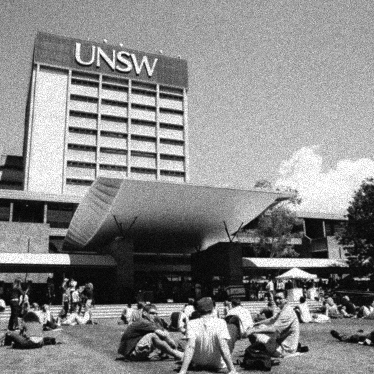

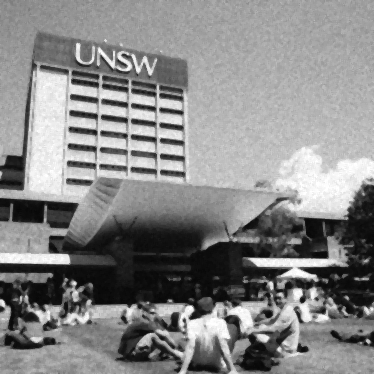

In [47]:
# above procedure for poisson noise

start_time_poisson_2 = time.time()
noisy_poisson_builtin = random_noise(ff_image,mode='poisson')
# above function returns a floating point image on range (0,1)
#therefore,
noisy_poisson_builtin  = np.array(255*noisy_poisson_builtin, dtype= 'uint8')
print("--- %s seconds ---" % (time.time() - start_time_poisson_2))

cv2_imshow(noisy_poisson_builtin)

#start_time_median_2 = time.time()
restored_poisson_2 = cv2.medianBlur(noisy_poisson_builtin,3)
#print("--- %s seconds ---" % (time.time() - start_time_median_2))

cv2_imshow(restored_poisson_2)